# Add nodal labels on plots {#labels}

You can add use label properties to add custom labels to specific nodes.
If the label for a node is not defined or [None]{.title-ref}, the nodal
scalar value of the currently active field at that node is shown. If no
field is active, the node ID is shown.


Import the `dpf_core` module, included examples files, and the
`DpfPlotter` module.


In [1]:
from ansys.dpf import core as dpf
from ansys.dpf.core import examples
from ansys.dpf.core.plotter import DpfPlotter

Open an example and print the `Model` object. The
`Model <ansys.dpf.core.model.Model>`{.interpreted-text role="class"}
class helps to organize access methods for the result by keeping track
of the operators and data sources used by the result file.

Printing the model displays this metadata:

-   Analysis type
-   Available results
-   Size of the mesh
-   Number of results


In [2]:
model = dpf.Model(examples.find_msup_transient())
print(model)

DPF Model
------------------------------
Transient analysis
Unit system: MKS: m, kg, N, s, V, A, degC
Physics Type: Mechanical
Available results:
     -  displacement: Nodal Displacement
     -  velocity: Nodal Velocity      
     -  acceleration: Nodal Acceleration
     -  reaction_force: Nodal Force   
     -  stress: ElementalNodal Stress 
     -  elemental_volume: Elemental Volume
     -  stiffness_matrix_energy: Elemental Energy-stiffness matrix
     -  artificial_hourglass_energy: Elemental Hourglass Energy
     -  thermal_dissipation_energy: Elemental thermal dissipation energy
     -  kinetic_energy: Elemental Kinetic Energy
     -  co_energy: Elemental co-energy
     -  incremental_energy: Elemental incremental energy
     -  elastic_strain: ElementalNodal Strain
------------------------------
DPF  Meshed Region: 
  393 nodes 
  40 elements 
  Unit: m 
  With solid (3D) elements
------------------------------
DPF  Time/Freq Support: 
  Number of sets: 20 
Cumulative     Time (

Get the meshed region.


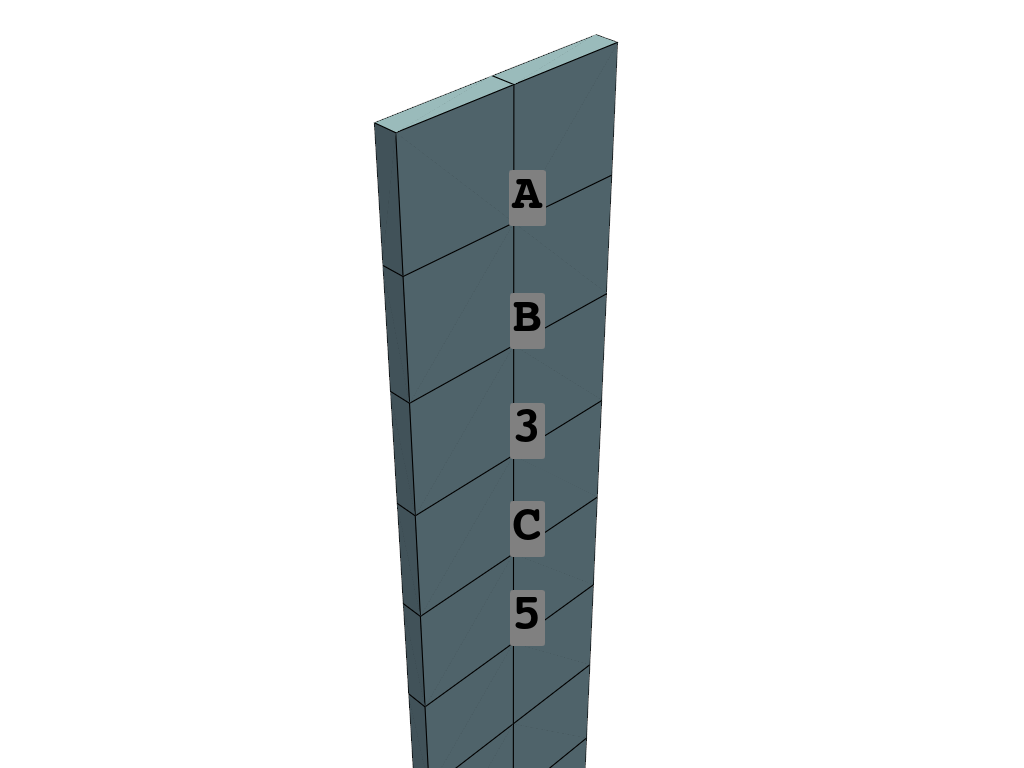

In [3]:
mesh_set = model.metadata.meshed_region

# One can plot the mesh with labels and/or node IDs shown
# for the first five nodes of the mesh.
plot = DpfPlotter()
plot.add_node_labels(
    nodes=mesh_set.nodes.scoping.ids[:5],
    meshed_region=mesh_set,
    labels=["A", "B", None, "C"],
    font_size=50,
)
plot.show_figure(
    cpos=[
        (0.3533494514377904, 0.312496303079723, 1.1859368974825752),
        (-0.07891143256220956, -0.11976458092027707, 0.7536760134825755),
        (0.0, 0.0, 1.0),
    ]
)
# sphinx_gallery_thumbnail_number = 2

Get the stress tensor and `connect` time scoping. Make sure that you
define `dpf.locations.nodal` as the scoping location because labels are
supported only for nodal results.


In [4]:
stress_tensor = model.results.stress()
stress_tensor.inputs.time_scoping([20])
stress_tensor.inputs.requested_location(dpf.locations.nodal)
# field = stress_tensor.outputs.fields_container.get_data()[0]

norm_op = dpf.operators.math.norm_fc()
norm_op.inputs.connect(stress_tensor)
field_norm_stress = norm_op.outputs.fields_container()[0]
print(field_norm_stress)

norm_op2 = dpf.Operator("norm_fc")
disp = model.results.displacement()
disp.inputs.time_scoping.connect([20])
norm_op2.inputs.connect(disp.outputs)
field_norm_disp = norm_op2.outputs.fields_container()[0]
print(field_norm_disp)

DPF stress_0.2s Field
  Location: Nodal
  Unit: Pa
  393 entities 
  Data:1 components and 393 elementary data 

DPF displacement_0.2s Field
  Location: Nodal
  Unit: m
  393 entities 
  Data:1 components and 393 elementary data 



Plot the results on the mesh and show the minimum and maximum.


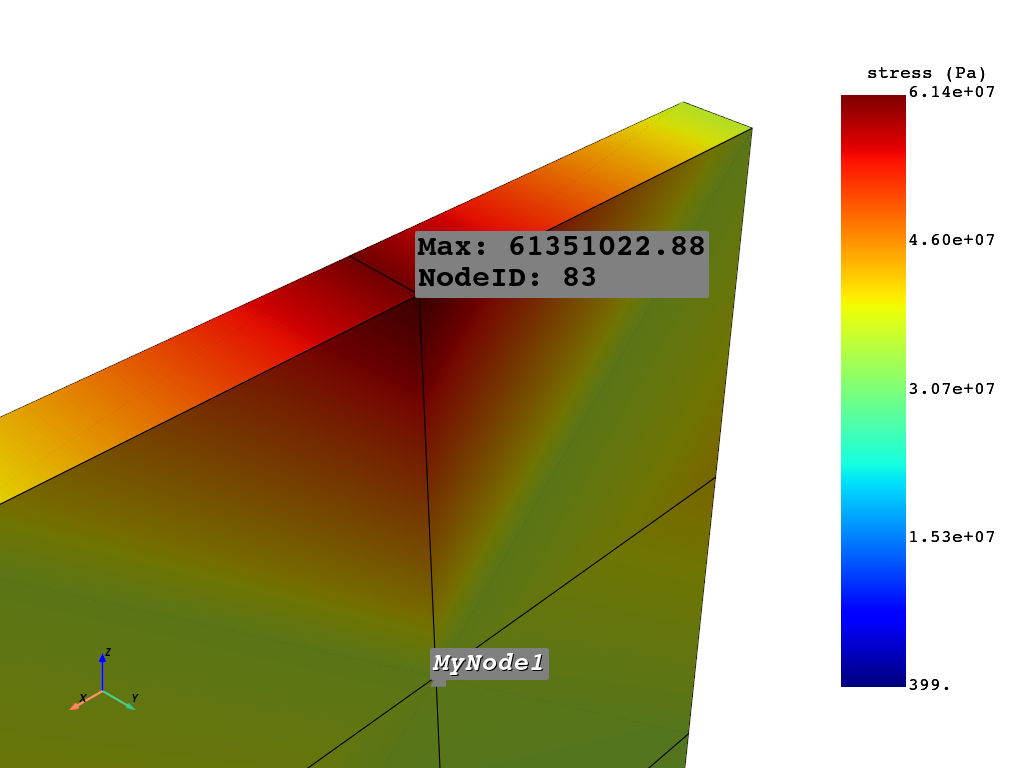

In [5]:
plot = DpfPlotter()
plot.add_field(
    field_norm_stress,
    meshed_region=mesh_set,
    show_max=True,
    show_min=True,
    label_text_size=30,
    label_point_size=5,
)


# Use label properties to add custom labels to specific nodes.
# If a label for a node is missing and a field is active,
# the nodal value for this field is shown.

my_nodes_1 = [mesh_set.nodes[0], mesh_set.nodes[10]]
my_labels_1 = ["MyNode1", "MyNode2"]
plot.add_node_labels(
    my_nodes_1,
    mesh_set,
    my_labels_1,
    italic=True,
    bold=True,
    font_size=26,
    text_color="white",
    font_family="courier",
    shadow=True,
    point_color="grey",
    point_size=20,
)

my_nodes_2 = [mesh_set.nodes[18], mesh_set.nodes[30]]
my_labels_2 = []  # ["MyNode3"]
plot.add_node_labels(
    my_nodes_2,
    mesh_set,
    my_labels_2,
    font_size=15,
    text_color="black",
    font_family="arial",
    shadow=False,
    point_color="white",
    point_size=15,
)

# Show figure.
# You can set the camera positions using the ``cpos`` argument.
# The three tuples in the list for the ``cpos`` argument represent the camera
# position, focal point, and view respectively.
plot.show_figure(
    show_axes=True,
    cpos=[(0.123, 0.095, 1.069), (-0.121, -0.149, 0.825), (0.0, 0.0, 1.0)]
)